<a href="https://colab.research.google.com/github/HyemiGu/ESC-22WINTER/blob/main/%EA%B5%AD%EB%82%B4_%EC%9D%BC%EB%B0%98%EB%B0%B0%EC%83%81%EC%B1%85%EC%9E%84_ppt%EC%9A%A9%EC%83%89%EC%84%A4%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Matplotlib 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,482 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121671 files and dire

In [1]:
# 런타임 다시 시작 후 아래 코드 실행
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

# 엑셀 파일 경로 지정
excel_file_path = '/content/20240110_사고데이터.xlsx'

# 엑셀 파일을 데이터프레임으로 읽기
ttlclaim = pd.read_excel(excel_file_path)

# 데이터프레임 확인
display(ttlclaim)

,unique_claim_id,계약번호,UY,종목명,수재보험료,수재발생손해액
0,2019.07~08 Torrential Rainfall(STATS),C2019028655442,201901,종합보험,69690835,2896305
1,2019.07~08 Torrential Rainfall(STATS),C2019024672398,201901,종합보험,97720575,6298932
2,2019.07~08 Torrential Rainfall(STATS),C2019022648225,201901,종합보험,107272821,4466931
3,2019.07~08 Torrential Rainfall(STATS),C2019014917987,201901,종합보험,4933150291,783680
4,2019.07~08 Torrential Rainfall(STATS),C2019014789929,201901,종합보험,122831588,151200
...,...,...,...,...,...,...
159417,UAE STORM (MAY 2020),C2015020859067,201501,기술보험,99044806,12846339
159418,Yecheon Pumped Storage Power Plant Flood,C2020012141755,202001,종합보험,575607015,33808436280
159419,농협 BBB 수재 XOL,C2021012373226,202101,기타특종보험,1199007600,845074316
159420,폴라리스쉬핑(주),C2019017271961,201901,선박보험,6310437,19287917760


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
ttlclaim.info()
ttlclaim.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159422 entries, 0 to 159421
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   unique_claim_id  159422 non-null  object
 1   계약번호             159422 non-null  object
 2   UY               159422 non-null  int64 
 3   종목명              159422 non-null  object
 4    수재보험료           159422 non-null  object
 5    수재발생손해액         159422 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.3+ MB


Index(['unique_claim_id', '계약번호', 'UY', '종목명', ' 수재보험료 ', ' 수재발생손해액 '], dtype='object')

In [3]:
# 수재보험료와 수재발생손해액 열을 숫자형으로 변환(문자열 " - "은 NaN으로 대체)
ttlclaim[' 수재보험료 '] = pd.to_numeric(ttlclaim[' 수재보험료 '], errors='coerce')
ttlclaim[' 수재발생손해액 '] = pd.to_numeric(ttlclaim[' 수재발생손해액 '], errors='coerce')

# 일반배상책임

In [4]:
# 주어진 데이터프레임 (ttlclaim)에서 '종목명'이 기술보험, 적하보험, 선박보험, 항공보험인 행들만 선택
selected_rows = ttlclaim[ttlclaim['종목명'].isin(['일반배상책임보험'])]

# 새로운 데이터프레임 생성 (tech_marine)
GL = pd.DataFrame(selected_rows)

# 결과 확인
display(GL)

,unique_claim_id,계약번호,UY,종목명,수재보험료,수재발생손해액
604,C2008040287119-20200501,C2008040287119,200804,일반배상책임보험,1.780423e+09,1047115.0
610,C2009040087304-20190801,C2009040087304,200904,일반배상책임보험,4.923927e+08,64295.0
672,C2009040186434-20190401,C2009040186434,200904,일반배상책임보험,6.114478e+08,7938728.0
856,C2010040234052-20190101,C2010040234052,201004,일반배상책임보험,3.926167e+09,1240558.0
857,C2010040234052-20190201,C2010040234052,201004,일반배상책임보험,3.926167e+09,896724.0
...,...,...,...,...,...,...
158169,LG Chemical Battery Explosion Product Liabilit...,C2018038900656,201801,일반배상책임보험,5.730283e+09,151081759.0
158170,LG Chemical Battery Explosion Product Liabilit...,C2018038900656,201801,일반배상책임보험,5.730283e+09,60524400.0
158171,LG Chemical Battery Explosion Product Liabilit...,C2018038900656,201801,일반배상책임보험,5.730283e+09,219144.0
158172,LG Chemical Battery Explosion Product Liabilit...,C2018038900656,201801,일반배상책임보험,5.730283e+09,90786600.0


In [5]:
# claim 횟수 계산 및 데이터 정리
GL['claim횟수'] = GL.groupby(['unique_claim_id', '계약번호']).cumcount() + 1
GL['수재보험료누적'] = GL.groupby(['unique_claim_id', '계약번호'])[' 수재보험료 '].cumsum()
GL['수재발생손해액누적'] = GL.groupby(['unique_claim_id', '계약번호'])[' 수재발생손해액 '].cumsum()

# '수재발생손해액누적' / '수재보험료누적'를 계산하여 '수재손해율' 열 추가
GL['수재손해율'] = GL['수재발생손해액누적'] / GL['수재보험료누적']

# 사고빈도 1로 초기화
GL['claim횟수'] = 1

# 중복된 데이터 삭제
GL_for_analysis = GL.drop_duplicates(subset=['unique_claim_id', '계약번호'], keep='last')

# 필요한 열만 선택
GL_for_analysis = GL_for_analysis[['unique_claim_id', '계약번호', 'UY', '종목명', '수재보험료누적', '수재발생손해액누적', '수재손해율', 'claim횟수']]

display(GL_for_analysis)

,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수
604,C2008040287119-20200501,C2008040287119,200804,일반배상책임보험,1.780423e+09,1.047115e+06,0.000588,1
610,C2009040087304-20190801,C2009040087304,200904,일반배상책임보험,4.923927e+08,6.429500e+04,0.000131,1
672,C2009040186434-20190401,C2009040186434,200904,일반배상책임보험,6.114478e+08,7.938728e+06,0.012983,1
856,C2010040234052-20190101,C2010040234052,201004,일반배상책임보험,3.926167e+09,1.240558e+06,0.000316,1
857,C2010040234052-20190201,C2010040234052,201004,일반배상책임보험,3.926167e+09,8.967240e+05,0.000228,1
...,...,...,...,...,...,...,...,...
158116,C2023028768134-20231109,C2023028768134,202301,일반배상책임보험,8.352000e+07,9.600000e+05,0.011494,1
158156,HYUNDAI PREMIUM OUTLETS DAEJEON FIRE PKG TPL,C2022015498984,202201,일반배상책임보험,9.284180e+08,1.894745e+09,2.040832,1
158157,Hyosung PL,C2019024852936,201901,일반배상책임보험,2.240490e+07,1.006363e+08,4.491711,1
158162,Kona EV Recall,C2020010001565,202001,일반배상책임보험,1.710576e+09,6.621106e+09,3.870688,1


## 결측치 및 음수 처리

In [ ]:
GL_for_analysis['수재발생손해액누적'].isna().value_counts()

False    38092
True       353
Name: 수재발생손해액누적, dtype: int64

In [ ]:
GL_for_analysis['수재보험료누적'].isna().value_counts()

False    37207
True      1238
Name: 수재보험료누적, dtype: int64

In [ ]:
GL_for_analysis.describe()

,UY,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수
count,38445.000000,3.720700e+04,3.809200e+04,3.708700e+04,38445.0
mean,202017.858811,4.325985e+08,8.748456e+06,1.834227e+03,1.0
std,167.540318,1.514407e+09,2.722837e+08,2.861037e+05,0.0
min,200804.000000,-1.214537e+07,-2.772811e+09,-6.151752e+06,1.0
25%,201901.000000,2.596578e+07,2.239700e+05,1.633204e-03,1.0
50%,202001.000000,1.125726e+08,5.712500e+05,5.931810e-03,1.0
75%,202101.000000,4.002000e+08,1.506000e+06,2.425711e-02,1.0
max,202301.000000,6.303312e+10,3.073511e+10,5.193500e+07,1.0


In [6]:
# NaN 값이 있는 행 제외
df = GL_for_analysis.dropna(subset=['수재발생손해액누적', '수재보험료누적', '수재손해율'])

# 음수 값이 있는 행 제외
df = df[(df['수재발생손해액누적'] >= 0) & (df['수재보험료누적'] >= 0) & (df['수재손해율'] >= 0)]

# 총 약 1,700 개 데이터가 제외되었음

In [ ]:
df.isna().value_counts()

unique_claim_id  계약번호   UY     종목명    수재보험료누적  수재발생손해액누적  수재손해율  claim횟수
False            False  False  False  False    False      False  False      36766
dtype: int64

In [ ]:
df.describe()

,UY,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수
count,36766.000000,3.676600e+04,3.676600e+04,3.676600e+04,36766.0
mean,202019.556166,4.123600e+08,8.567318e+06,2.017541e+03,1.0
std,163.786581,1.467510e+09,2.756522e+08,2.855521e+05,0.0
min,200804.000000,1.000000e+00,1.000000e+00,1.360544e-09,1.0
25%,201901.000000,2.541943e+07,2.325000e+05,1.679789e-03,1.0
50%,202001.000000,1.075508e+08,5.867105e+05,6.076398e-03,1.0
75%,202101.000000,3.812780e+08,1.521343e+06,2.451538e-02,1.0
max,202301.000000,6.303312e+10,3.073511e+10,5.193500e+07,1.0


## Outlier 제외

In [7]:
# 보험료와 손해액 outliers 필터링 based on z-score
z_score_threshold = 3
outlier_mask1 = (df['수재발생손해액누적'] - df['수재발생손해액누적'].mean()) / df['수재발생손해액누적'].std() > z_score_threshold
df_no_outliers1 = df[~outlier_mask1]

outlier_mask2 = (df['수재보험료누적'] - df['수재보험료누적'].mean()) / df['수재보험료누적'].std() > z_score_threshold
df_no_outliers = df_no_outliers1[~outlier_mask2]

<ipython-input-7-f1a7ebcc88af>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers1[~outlier_mask2]


In [ ]:
df_no_outliers1.describe()

# 발생손해액 아웃라이어는 총 400개

,UY,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수
count,36722.000000,3.672200e+04,3.672200e+04,3.672200e+04,36722.0
mean,202019.447688,3.979710e+08,3.995070e+06,2.019726e+03,1.0
std,163.785160,1.342909e+09,2.804268e+07,2.857231e+05,0.0
min,200804.000000,1.000000e+00,1.000000e+00,1.360544e-09,1.0
25%,201901.000000,2.541943e+07,2.322100e+05,1.678407e-03,1.0
50%,202001.000000,1.075358e+08,5.845750e+05,6.059027e-03,1.0
75%,202101.000000,3.812780e+08,1.516150e+06,2.443299e-02,1.0
max,202301.000000,2.275638e+10,8.259694e+08,5.193500e+07,1.0


In [ ]:
df_no_outliers.describe()

# 총 444(400+44) 개 제외

,UY,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수
count,36322.000000,3.632200e+04,3.632200e+04,3.632200e+04,36322.0
mean,202023.090992,2.706913e+08,2.964379e+06,2.041968e+03,1.0
std,157.940232,3.705779e+08,1.850307e+07,2.872920e+05,0.0
min,200804.000000,1.000000e+00,1.000000e+00,1.360544e-09,1.0
25%,201901.000000,2.500000e+07,2.312198e+05,1.712661e-03,1.0
50%,202001.000000,1.067645e+08,5.772000e+05,6.141178e-03,1.0
75%,202101.000000,3.631771e+08,1.485028e+06,2.463573e-02,1.0
max,202301.000000,3.926167e+09,8.140425e+08,5.193500e+07,1.0


In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Elbow Method (EPI 구간의 개수 설정)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

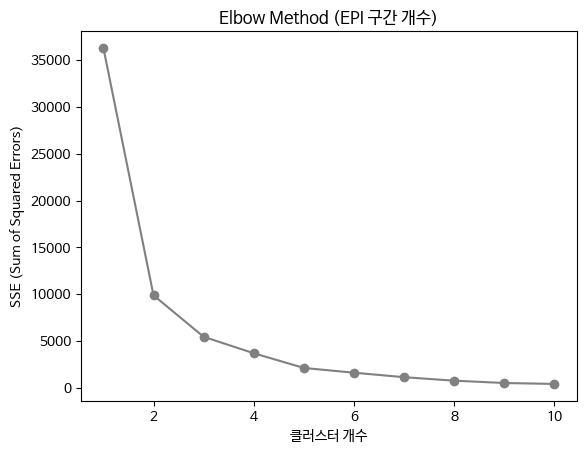

In [9]:
# 아웃라이어 제거한 df 에서 보험료 열만 사용
EPI = df_no_outliers[['수재보험료누적']]

# EPI 표준화
scaler_EPI = StandardScaler()
standardized_EPI = scaler_EPI.fit_transform(EPI)

# Elbow Method 사용하여 적절한 클러스터 개수 찾기
sse_EPI =[]
K_range = range(1,11)
for K_EPI in K_range:
  kmeans_EPI = KMeans(n_clusters=K_EPI, random_state=42)
  kmeans_EPI.fit(standardized_EPI)
  sse_EPI.append(kmeans_EPI.inertia_)

# Elbow Method 그래프 출력
plt.plot(K_range, sse_EPI, marker='o', color='gray')
plt.xlabel('클러스터 개수')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method (EPI 구간 개수)')
plt.show()

### EPI 구간이 3개일 때 k-means

In [10]:
# K-means 클러스터링 (k=3)
kmeans_EPI_3 = KMeans(n_clusters=3, random_state=42)
clusters_EPI_3 = kmeans_EPI_3.fit_predict(standardized_EPI)

# 결과를 데이터프레임에 추가
df_no_outliers['클러스터_3개'] = clusters_EPI_3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-348f20bc2063>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['클러스터_3개'] = clusters_EPI_3


In [11]:
df_no_outliers

,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수,클러스터_3개
604,C2008040287119-20200501,C2008040287119,200804,일반배상책임보험,1.780423e+09,1047115.0,0.000588,1,1
610,C2009040087304-20190801,C2009040087304,200904,일반배상책임보험,4.923927e+08,64295.0,0.000131,1,2
672,C2009040186434-20190401,C2009040186434,200904,일반배상책임보험,6.114478e+08,7938728.0,0.012983,1,2
856,C2010040234052-20190101,C2010040234052,201004,일반배상책임보험,3.926167e+09,1240558.0,0.000316,1,1
857,C2010040234052-20190201,C2010040234052,201004,일반배상책임보험,3.926167e+09,896724.0,0.000228,1,1
...,...,...,...,...,...,...,...,...,...
158113,C2023028544183-20231114,C2023028544183,202301,일반배상책임보험,2.049478e+08,2070000.0,0.010100,1,0
158114,C2023028544183-20231122,C2023028544183,202301,일반배상책임보험,2.049478e+08,138000.0,0.000673,1,0
158115,C2023028768134-20231108,C2023028768134,202301,일반배상책임보험,8.352000e+07,1080000.0,0.012931,1,0
158116,C2023028768134-20231109,C2023028768134,202301,일반배상책임보험,8.352000e+07,960000.0,0.011494,1,0


In [12]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 초기화
scaler = StandardScaler()

# 데이터를 표준화
standardized_EPI = scaler.fit_transform(EPI)

# K-means 클러스터링 (k=3)
kmeans_EPI_3 = KMeans(n_clusters=3, random_state=42)
clusters_EPI_3 = kmeans_EPI_3.fit_predict(standardized_EPI)

# 결과를 데이터프레임에 추가
df_no_outliers['클러스터_3개'] = clusters_EPI_3

# 클러스터 중심을 원래의 스케일로 변환
cluster_centers_original_scale = scaler.inverse_transform(kmeans_EPI_3.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-9e28f9ee2d6c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['클러스터_3개'] = clusters_EPI_3


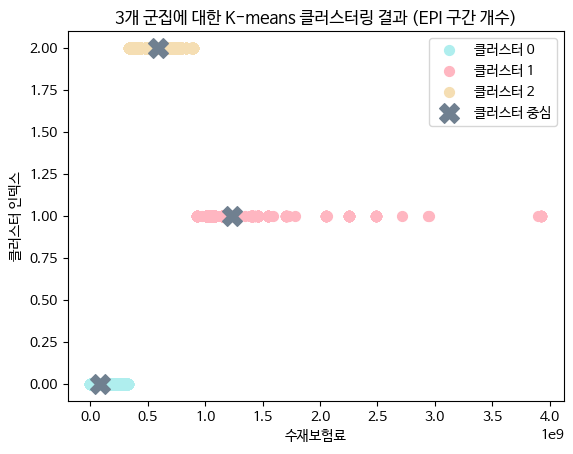

In [ ]:
colors_3개 = ['aquamarine', 'mediumaquamarine', 'teal']
for cluster_num_EPI in range(3):
    cluster_data_EPI = EPI[clusters_EPI_3 == cluster_num_EPI]
    plt.scatter(cluster_data_EPI['수재보험료누적'],
                [cluster_num_EPI] * len(cluster_data_EPI),
                label=f'클러스터 {cluster_num_EPI}', s=50, color=colors_3개[cluster_num_EPI])

fig = plt.figure(figsize=(8,8), facecolor='white')
ax = fig.add_subplot()
ax.plot(range(10))
ax.axvspan(1,3, facecolor='gray', alpha=0.6) # x가 1~3에 해당하는 부분 배경색 설정

# 클러스터 중심 플로팅
plt.scatter(cluster_centers_original_scale[:, 0], [0, 1, 2], # y 값을 클러스터 인덱스로 지정
            color='slategrey', marker='X', s=200, label='클러스터 중심')

# 축 레이블 및 그래픽 설정
plt.xlabel('수재보험료')
plt.ylabel('클러스터 인덱스')
plt.title('3개 군집에 대한 K-means 클러스터링 결과 (EPI 구간 개수)')
plt.legend()
plt.show()


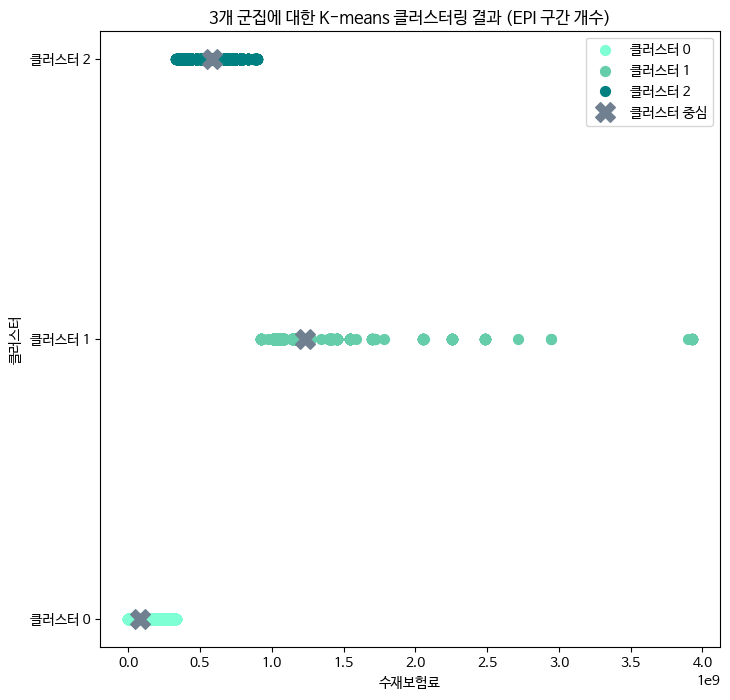

In [ ]:
colors_3개 = ['aquamarine', 'mediumaquamarine', 'teal']

# 그래프 초기 설정
fig = plt.figure(figsize=(8,8), facecolor='white')
ax = fig.add_subplot()

# 각 클러스터 데이터를 수재보험료와 클러스터 인덱스로 플로팅
for cluster_num_EPI in range(3):
    cluster_data_EPI = EPI[clusters_EPI_3 == cluster_num_EPI]
    plt.scatter(cluster_data_EPI['수재보험료누적'],
                [cluster_num_EPI] * len(cluster_data_EPI),
                label=f'클러스터 {cluster_num_EPI}', s=50, color=colors_3개[cluster_num_EPI])

# x축의 값을 클러스터 인덱스로, y축의 값을 수재보험료로 설정
ax.set_yticks(range(3))
ax.set_yticklabels(['클러스터 0', '클러스터 1', '클러스터 2'])

# 클러스터 중심 플로팅
plt.scatter(cluster_centers_original_scale[:, 0], range(3), # y 값을 클러스터 인덱스로 지정
            color='slategrey', marker='X', s=200, label='클러스터 중심')

# 배경색 설정
ax.axvspan(1,3, facecolor='gray', alpha=0.6) # x가 1~3에 해당하는 부분 배경색 설정

# 축 레이블 및 그래픽 설정
plt.xlabel('수재보험료(단위:십억원)')
plt.ylabel('클러스터')
plt.title('3개 군집에 대한 K-means 클러스터링 결과 (EPI 구간 개수)')
plt.legend()
plt.show()

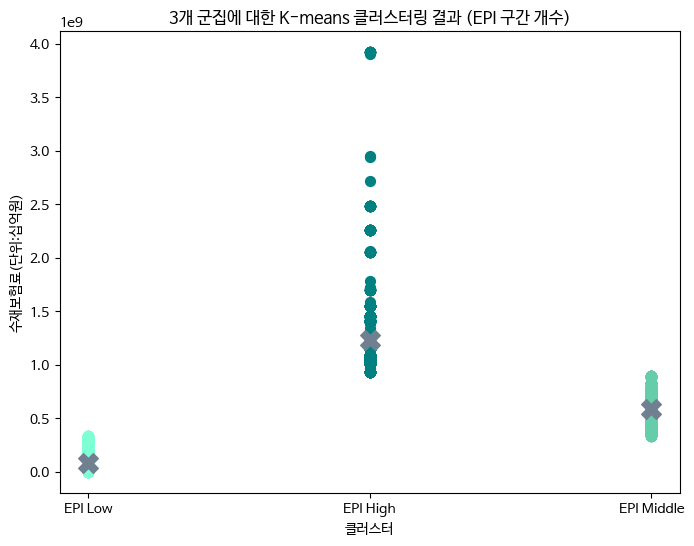

In [ ]:
colors_3개 = ['aquamarine', 'teal', 'mediumaquamarine']

# 그래프 초기 설정
fig = plt.figure(figsize=(8,6), facecolor='white')
ax = fig.add_subplot()

# 각 클러스터 데이터를 수재보험료와 클러스터 인덱스로 플로팅
for cluster_num_EPI in range(3):
    cluster_data_EPI = EPI[clusters_EPI_3 == cluster_num_EPI]
    plt.scatter([cluster_num_EPI] * len(cluster_data_EPI), cluster_data_EPI['수재보험료누적'],
                label=f'클러스터 {cluster_num_EPI}', s=50, color=colors_3개[cluster_num_EPI])

# y축의 값을 클러스터 인덱스로, x축의 값을 수재보험료로 설정
ax.set_xticks(range(3))
ax.set_xticklabels(['EPI Low', 'EPI High', 'EPI Middle'])

# 클러스터 중심 플로팅
plt.scatter(range(3), cluster_centers_original_scale[:, 0], # x 값을 클러스터 인덱스로 지정
            color='slategrey', marker='X', s=200, label='클러스터 중심')

# 배경색 설정
ax.axhspan(1,3, facecolor='gray', alpha=0.6) # y가 1~3에 해당하는 부분 배경색 설정

# 축 레이블 및 그래픽 설정
plt.xlabel('클러스터')
plt.ylabel('수재보험료(단위:십억원)')
plt.title('3개 군집에 대한 K-means 클러스터링 결과 (EPI 구간 개수)')
plt.show()

In [ ]:
# 클러스터 1에 해당하는 수재보험료 데이터의 최솟값
cluster_1_data_EPI = EPI[clusters_EPI_3 == 1]  # 클러스터 1에 해당하는 데이터 선택
min_value_cluster_1 = cluster_1_data_EPI['수재보험료누적'].min()  # 선택된 데이터에서 '수재보험료누적' 열의 최솟값 계산
print(f'클러스터 1에 해당하는 수재보험료 데이터의 최솟값: {min_value_cluster_1}')

# 클러스터 2에 해당하는 수재보험료 데이터의 최솟값
cluster_2_data_EPI = EPI[clusters_EPI_3 == 2]  # 클러스터 2에 해당하는 데이터 선택
min_value_cluster_2 = cluster_2_data_EPI['수재보험료누적'].min()  # 선택된 데이터에서 '수재보험료누적' 열의 최솟값 계산
print(f'클러스터 2에 해당하는 수재보험료 데이터의 최솟값: {min_value_cluster_2}')

클러스터 1에 해당하는 수재보험료 데이터의 최솟값: 928417971.0
클러스터 2에 해당하는 수재보험료 데이터의 최솟값: 335768719.0


In [ ]:
# 클러스터 0에 해당하는 데이터의 개수
count_cluster_0 = len(EPI[clusters_EPI_3 == 0])
print(f'클러스터 0에 해당하는 데이터의 개수: {count_cluster_0}')

# 클러스터 1에 해당하는 데이터의 개수
count_cluster_1 = len(EPI[clusters_EPI_3 == 1])
print(f'클러스터 1에 해당하는 데이터의 개수: {count_cluster_1}')

# 클러스터 2에 해당하는 데이터의 개수
count_cluster_2 = len(EPI[clusters_EPI_3 == 2])
print(f'클러스터 2에 해당하는 데이터의 개수: {count_cluster_2}')

클러스터 0에 해당하는 데이터의 개수: 26388
클러스터 1에 해당하는 데이터의 개수: 2819
클러스터 2에 해당하는 데이터의 개수: 7115



*   cluster 0 가 EPI low
*   cluster 1 가 EPI high
*   cluster 2 가 EPI middle



In [15]:
# 클러스터에 따라 데이터 분류
EPI_low = df_no_outliers[df_no_outliers['클러스터_3개'] == 0]
EPI_middle = df_no_outliers[df_no_outliers['클러스터_3개'] == 2]
EPI_high = df_no_outliers[df_no_outliers['클러스터_3개'] == 1]


# 저장된 데이터프레임 확인
print("EPI_low:")
print(EPI_low.head())

print("\nEPI_middle:")
print(EPI_middle.head())

print("\nEPI_high:")
print(EPI_high.head())

EPI_low:
              unique_claim_id            계약번호      UY       종목명      수재보험료누적  \
2040  C2015012937099-20200701  C2015012937099  201501  일반배상책임보험  200952700.0   
2041  C2015012937099-20200901  C2015012937099  201501  일반배상책임보험  200952700.0   
2042  C2015012937099-20210201  C2015012937099  201501  일반배상책임보험  200952700.0   
2070  C2015013849512-20190801  C2015013849512  201501  일반배상책임보험  152000000.0   
2071  C2015013849512-20200201  C2015013849512  201501  일반배상책임보험  152000000.0   

       수재발생손해액누적     수재손해율  claim횟수  클러스터_3개  
2040   4130655.0  0.020555        1        0  
2041  18164436.0  0.090392        1        0  
2042   2097118.0  0.010436        1        0  
2070  10270262.0  0.067568        1        0  
2071     92000.0  0.000605        1        0  

EPI_middle:
              unique_claim_id            계약번호      UY       종목명      수재보험료누적  \
610   C2009040087304-20190801  C2009040087304  200904  일반배상책임보험  492392717.0   
672   C2009040186434-20190401  C2009040186434  200904  

# Clustering

## Elbow Method (epi low)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

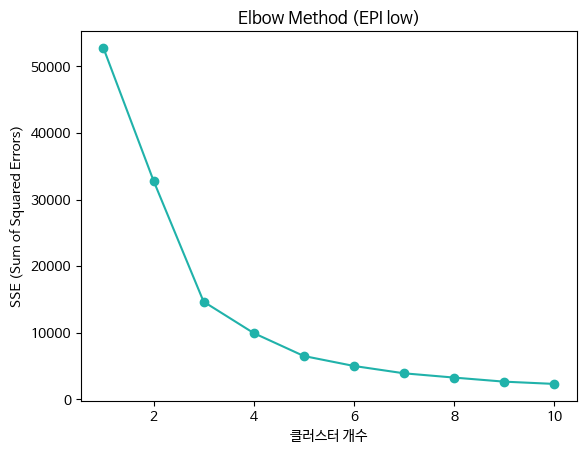

In [16]:
# df_2사분위에서 '수재보험료누적', '수재발생손해액누적' 열만 사용
df_EPI_low = EPI_low[['수재보험료누적', '수재발생손해액누적']]

# 데이터 표준화
scaler_EPI_low = StandardScaler()
standardized_EPI_low = scaler_EPI_low.fit_transform(df_EPI_low)

# Elbow Method를 사용하여 적절한 클러스터 개수 찾기
sse_EPI_low = []
K_EPI_low = range(1, 11)
for k_low in K_EPI_low:
    kmeans_EPI_low = KMeans(n_clusters=k_low, random_state=42)
    kmeans_EPI_low.fit(standardized_EPI_low)
    sse_EPI_low.append(kmeans_EPI_low.inertia_)

# Elbow Method 그래프 출력
plt.plot(K_EPI_low, sse_EPI_low, color = 'lightseagreen', marker='o')
plt.xlabel('클러스터 개수')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method (EPI low)')
plt.show()

## k = 3 일 때 K-means (EPI low)

In [18]:
# K-means 클러스터링 (k=3)
kmeans_EPI_low_3 = KMeans(n_clusters=3, random_state=42)
clusters_EPI_low_3 = kmeans_EPI_low_3.fit_predict(standardized_EPI_low)

# 결과를 데이터프레임에 추가
EPI_low['3-Means'] = clusters_EPI_low_3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-18-9ab5cb58c3df>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPI_low['3-Means'] = clusters_EPI_low_3


## k=5 일 때 k-means

In [17]:
# 각 클러스터에 대해 데이터 포인트를 2차원 평면에 플로팅
colors_EPI_low_3 = ['paleturquoise', 'lightcoral',  'palegreen']
for cluster_num_EPI_low_3 in range(3):
    cluster_data_EPI_low_3 = EPI_low[clusters_EPI_low_3 == cluster_num_EPI_low_3]
    plt.scatter(cluster_data_EPI_low_3['수재보험료누적'], cluster_data_EPI_low_3['수재발생손해액누적'],
                label=f'클러스터 {cluster_num_EPI_low_3}', s=50, color=colors_EPI_low_3[cluster_num_EPI_low_3])

# 클러스터 중심 플로팅
cluster_centers_2d_EPI_low_3 = scaler_EPI_low.inverse_transform(kmeans_EPI_low_3.cluster_centers_)
plt.scatter(cluster_centers_2d_EPI_low_3[:, 0], cluster_centers_2d_EPI_low_3[:, 1],
            color='slategrey', marker='X', s=200, label='클러스터 중심')

# 축 레이블 및 그래픽 설정
plt.xlabel('수재보험료(단위:억원)')
plt.ylabel('수재발생손해액(단위:억원)')
plt.title('3개 군집에 대한 K-means 클러스터링 결과 (EPI low)')
plt.legend()
plt.show()

NameError: name 'clusters_EPI_low_3' is not defined

In [ ]:
# 3개 클러스터에 해당하는 데이터의 개수 알아내기
count_clusters_EPI_low_k3 = []
for cluster_num in range(3):
    count = len(EPI_low[clusters_EPI_low_3 == cluster_num])
    count_clusters_EPI_low_k3.append(count)
    print(f'클러스터 {cluster_num}에 해당하는 데이터의 개수: {count}')

In [19]:
# K-means 클러스터링 (k=5)
kmeans_EPI_low_5 = KMeans(n_clusters=5, random_state=42)
clusters_EPI_low_5 = kmeans_EPI_low_5.fit_predict(standardized_EPI_low)

# 결과를 데이터프레임에 추가
EPI_low['5-Means'] = clusters_EPI_low_5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-19-1b2861694946>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPI_low['5-Means'] = clusters_EPI_low_5


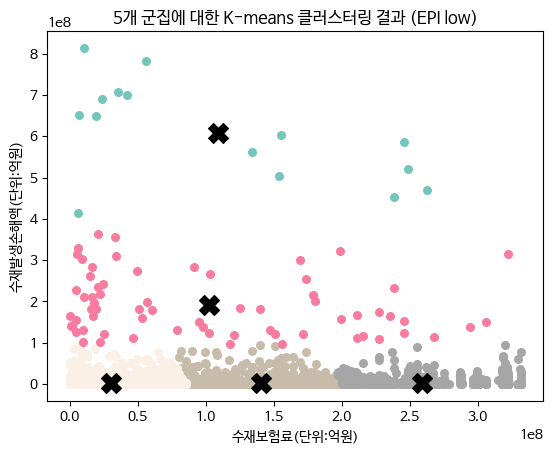

In [47]:
# 각 클러스터에 대해 데이터 포인트를 2차원 평면에 플로팅
colors_EPI_low_5 = ['#c7bcaa', '#faf0e6', '#74c6ba', '#a6a6a6', '#f77c9f']
for cluster_num_EPI_low_5 in range(5):
    cluster_data_EPI_low_5 = EPI_low[clusters_EPI_low_5 == cluster_num_EPI_low_5]
    plt.scatter(cluster_data_EPI_low_5['수재보험료누적'], cluster_data_EPI_low_5['수재발생손해액누적'],
                label=f'클러스터 {cluster_num_EPI_low_5}', s=30, color=colors_EPI_low_5[cluster_num_EPI_low_5])

# 클러스터 중심 플로팅
cluster_centers_2d_EPI_low_5 = scaler_EPI_low.inverse_transform(kmeans_EPI_low_5.cluster_centers_)
plt.scatter(cluster_centers_2d_EPI_low_5[:, 0], cluster_centers_2d_EPI_low_5[:, 1],
            color='k', marker='X', s=200, label='클러스터 중심')

# 축 레이블 및 그래픽 설정
plt.xlabel('수재보험료(단위:억원)')
plt.ylabel('수재발생손해액(단위:억원)')
plt.title('5개 군집에 대한 K-means 클러스터링 결과 (EPI low)')
plt.show()

In [ ]:
# 5개 클러스터에 해당하는 데이터의 개수 알아내기
count_clusters_EPI_low_k5 = []
for cluster_num in range(5):
    count = len(EPI_low[clusters_EPI_low_5 == cluster_num])
    count_clusters_EPI_low_k5.append(count)
    print(f'클러스터 {cluster_num}에 해당하는 데이터의 개수: {count}')

클러스터 0에 해당하는 데이터의 개수: 6418
클러스터 1에 해당하는 데이터의 개수: 16930
클러스터 2에 해당하는 데이터의 개수: 15
클러스터 3에 해당하는 데이터의 개수: 2959
클러스터 4에 해당하는 데이터의 개수: 66


In [ ]:
# 클러스터 4에 해당하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터 찾기
cluster_4_data_min_loss_EPI_low = EPI_low[EPI_low['5-Means'] == 4].nsmallest(1, '수재발생손해액누적')

# 부동소수점 표기법 수정 및 'e' 제거
cluster_4_data_min_loss_EPI_low['수재발생손해액누적'] = cluster_4_data_min_loss_EPI_low['수재발생손해액누적'].apply(lambda x: '{:,.0f}'.format(x))
cluster_4_data_min_loss_EPI_low['수재보험료누적'] = cluster_4_data_min_loss_EPI_low['수재보험료누적'].apply(lambda x: '{:,.0f}'.format(x))

# 출력
print("\n클러스터 4에 속하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터:")
display(cluster_4_data_min_loss_EPI_low)


클러스터 4에 속하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터:


,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수,클러스터_3개,5-Means
99429,C2021016674785-20211228,C2021016673063,202101,일반배상책임보험,"155,788,020","97,216,481",0.624031,1,0,4


In [ ]:
# 원하는 열 선택
선택된_열 = ['수재보험료누적', '수재발생손해액누적']

# 각 클러스터 중심값 출력 (부동소수점 표기법 수정)
클러스터별_중심값 = pd.DataFrame(scaler_EPI_low.inverse_transform(kmeans_EPI_low_5.cluster_centers_), columns=선택된_열)
# 부동소수점 표기법 수정 및 출력
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))
print("\n각 클러스터 중심값:")
display(클러스터별_중심값)



각 클러스터 중심값:


,수재보험료누적,수재발생손해액누적
0,"140,735,808","1,920,986"
1,"30,007,279","1,161,732"
2,"109,141,136","607,126,211"
3,"258,865,014","3,003,069"
4,"102,201,568","190,006,372"


✅ 9천 7백만원

### Elbow Method (EPI middle)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

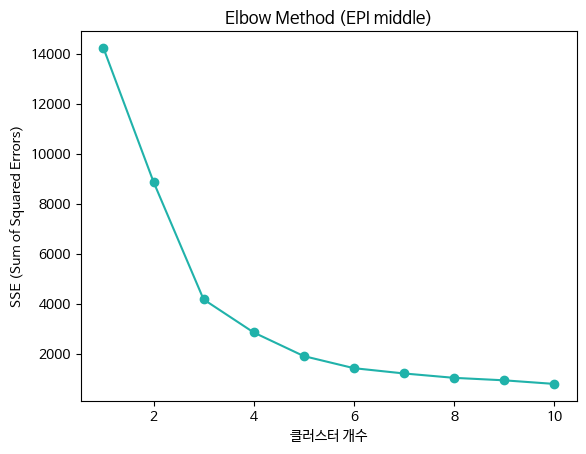

In [30]:
# EPI_middle에서 '수재보험료누적', '수재발생손해액누적' 열만 선택
df_EPI_middle = EPI_middle[['수재보험료누적', '수재발생손해액누적']]

# 데이터 표준화
scaler_EPI_middle = StandardScaler()
standardized_EPI_middle = scaler_EPI_middle.fit_transform(df_EPI_middle)

# Elbow Method를 사용하여 적절한 클러스터 개수 찾기
sse_EPI_middle = []
K_EPI_middle = range(1, 11)
for k_middle in K_EPI_middle:
    kmeans_EPI_middle = KMeans(n_clusters=k_middle, random_state=42)
    kmeans_EPI_middle.fit(standardized_EPI_middle)
    sse_EPI_middle.append(kmeans_EPI_middle.inertia_)

# Elbow Method 그래프 출력
plt.plot(K_EPI_middle, sse_EPI_middle, color='lightseagreen', marker='o')
plt.xlabel('클러스터 개수')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method (EPI middle)')
plt.show()

### k=3 일 떄 K means (EPI middle)
안쓸 내용~

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-86-1aaa8f97217f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPI_middle['3-Means'] = clusters_EPI_middle


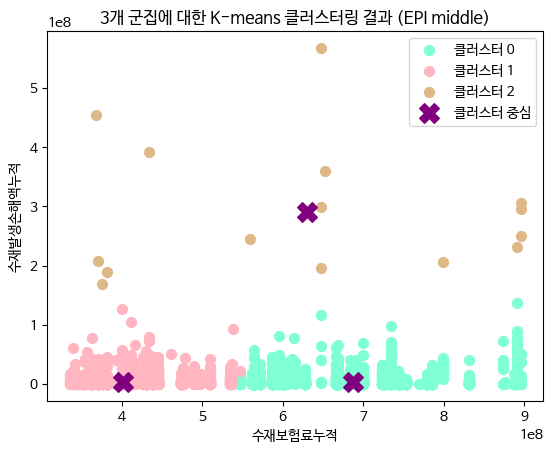

In [ ]:
# K-means 클러스터링 (k=3) - EPI_middle 기준
kmeans_EPI_middle = KMeans(n_clusters=3, random_state=42)
clusters_EPI_middle = kmeans_EPI_middle.fit_predict(standardized_EPI_middle)

# 결과를 데이터프레임에 추가
EPI_middle['3-Means'] = clusters_EPI_middle

# 클러스터링 결과 시각화
colors_3개 = ['aquamarine', 'lightpink', 'burlywood']
for cluster_num_EPI in range(3):
    cluster_data_EPI = EPI_middle[clusters_EPI_middle == cluster_num_EPI]
    plt.scatter(cluster_data_EPI['수재보험료누적'],
                cluster_data_EPI['수재발생손해액누적'],
                label=f'클러스터 {cluster_num_EPI}', s=50, color=colors_3개[cluster_num_EPI])

# 클러스터 중심 플로팅
cluster_centers_2d_EPI_middle = scaler_EPI_middle.inverse_transform(kmeans_EPI_middle.cluster_centers_)
plt.scatter(cluster_centers_2d_EPI_middle[:, 0], cluster_centers_2d_EPI_middle[:, 1],
            color='purple', marker='X', s=200, label='클러스터 중심')

# 축 레이블 및 그래픽 설정
plt.xlabel('수재보험료누적')
plt.ylabel('수재발생손해액누적')
plt.title('3개 군집에 대한 K-means 클러스터링 결과 (EPI middle)')
plt.legend()
plt.show()


# k=5 일 때 k-means (EPI middle)
7000 개 사고 중 200개

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-122-ab6e02ca9b9b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPI_middle['5-Means'] = clusters_EPI_middle_k5


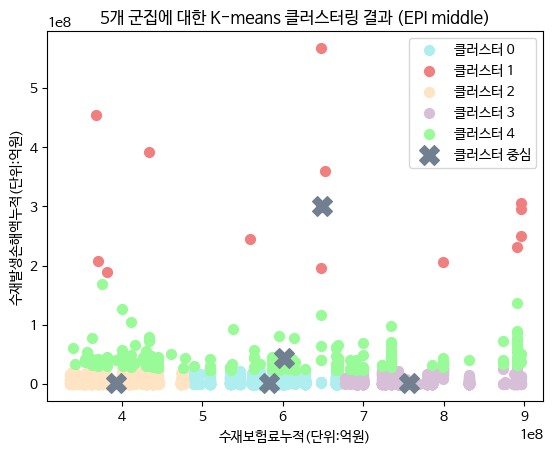

In [ ]:
# K-means 클러스터링 (k=5) - EPI_middle 기준
kmeans_EPI_middle_k5 = KMeans(n_clusters=5, random_state=42)
clusters_EPI_middle_k5 = kmeans_EPI_middle_k5.fit_predict(standardized_EPI_middle)

# 결과를 데이터프레임에 추가
EPI_middle['5-Means'] = clusters_EPI_middle_k5

# 클러스터링 결과 시각화
colors_EPI_middle_5 = ['paleturquoise', 'lightcoral', 'bisque', 'thistle', 'palegreen']
for cluster_num_EPI in range(5):
    cluster_data_EPI = EPI_middle[clusters_EPI_middle_k5 == cluster_num_EPI]
    plt.scatter(cluster_data_EPI['수재보험료누적'],
                cluster_data_EPI['수재발생손해액누적'],
                label=f'클러스터 {cluster_num_EPI}', s=50, color=colors_EPI_middle_5[cluster_num_EPI])

# 클러스터 중심 플로팅
cluster_centers_2d_EPI_middle_k5 = scaler_EPI_middle.inverse_transform(kmeans_EPI_middle_k5.cluster_centers_)
plt.scatter(cluster_centers_2d_EPI_middle_k5[:, 0], cluster_centers_2d_EPI_middle_k5[:, 1],
            color='slategrey', marker='X', s=200, label='클러스터 중심')

# 축 레이블 및 그래픽 설정
plt.xlabel('수재보험료누적(단위:억원)')
plt.ylabel('수재발생손해액누적(단위:억원)')
plt.title('5개 군집에 대한 K-means 클러스터링 결과 (EPI middle)')
plt.legend()
plt.show()


In [ ]:
# 5개 클러스터에 해당하는 데이터의 개수 알아내기
count_clusters_EPI_middle_k5 = []
for cluster_num in range(5):
    count = len(EPI_middle[clusters_EPI_middle_k5 == cluster_num])
    count_clusters_EPI_middle_k5.append(count)
    print(f'클러스터 {cluster_num}에 해당하는 데이터의 개수: {count}')

클러스터 0에 해당하는 데이터의 개수: 2005
클러스터 1에 해당하는 데이터의 개수: 14
클러스터 2에 해당하는 데이터의 개수: 2289
클러스터 3에 해당하는 데이터의 개수: 2626
클러스터 4에 해당하는 데이터의 개수: 181


In [ ]:
# 클러스터 4에 해당하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터 찾기
cluster_4_data_min_loss_EPI_middle = EPI_middle[EPI_middle['5-Means'] == 4].nsmallest(1, '수재발생손해액누적')

# 부동소수점 표기법 수정 및 'e' 제거
cluster_4_data_min_loss_EPI_middle['수재발생손해액누적'] = cluster_4_data_min_loss_EPI_middle['수재발생손해액누적'].apply(lambda x: '{:,.0f}'.format(x))
cluster_4_data_min_loss_EPI_middle['수재보험료누적'] = cluster_4_data_min_loss_EPI_middle['수재보험료누적'].apply(lambda x: '{:,.0f}'.format(x))

# 출력
print("\n클러스터 4에 속하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터:")
display(cluster_4_data_min_loss_EPI_middle)


클러스터 4에 속하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터:


,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수,클러스터_3개,5-Means
21534,C2018039800475-20190227,C2018039800475,201801,일반배상책임보험,"666,000,000","23,163,527",0.03478,1,2,4


# k=7 일 때 k-means (EPI middle)
7000개 사고 중 44개
클러스터 4,2,6

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-45-bf95f851541a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPI_middle['7-Means'] = clusters_EPI_middle_k7


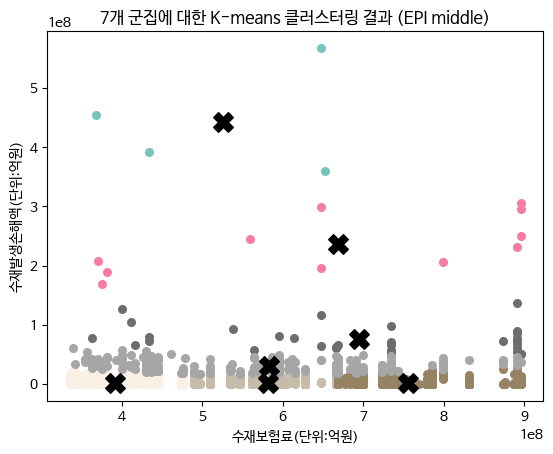

In [45]:
# K-means 클러스터링 (k=7) - EPI_middle 기준
kmeans_EPI_middle_k7 = KMeans(n_clusters=7, random_state=42)
clusters_EPI_middle_k7 = kmeans_EPI_middle_k7.fit_predict(standardized_EPI_middle)

# 결과를 데이터프레임에 추가
EPI_middle['7-Means'] = clusters_EPI_middle_k7

# 클러스터링 결과 시각화
colors_EPI_middle_7 = ['#c7bcaa', '#968364', '#f77c9f', '#faf0e6', '#6d6d6d', '#a6a6a6', '#74c6ba']
for cluster_num_EPI in range(7):
    cluster_data_EPI = EPI_middle[clusters_EPI_middle_k7 == cluster_num_EPI]
    plt.scatter(cluster_data_EPI['수재보험료누적'],
                cluster_data_EPI['수재발생손해액누적'],
                label=f'클러스터 {cluster_num_EPI}', s=30, color=colors_EPI_middle_7[cluster_num_EPI])

# 클러스터 중심 플로팅
cluster_centers_2d_EPI_middle_k7 = scaler_EPI_middle.inverse_transform(kmeans_EPI_middle_k7.cluster_centers_)
plt.scatter(cluster_centers_2d_EPI_middle_k7[:, 0], cluster_centers_2d_EPI_middle_k7[:, 1],
            color='k', marker='X', s=200, label='클러스터 중심')

# 축 레이블 및 그래픽 설정
plt.xlabel('수재보험료(단위:억원)')
plt.ylabel('수재발생손해액(단위:억원)')
plt.title('7개 군집에 대한 K-means 클러스터링 결과 (EPI middle)')
plt.show()

In [ ]:
# 7개 클러스터에 해당하는 데이터의 개수 알아내기
count_clusters_EPI_middle_k7 = []
for cluster_num in range(7):
    count = len(EPI_middle[clusters_EPI_middle_k7 == cluster_num])
    count_clusters_EPI_middle_k7.append(count)
    print(f'클러스터 {cluster_num}에 해당하는 데이터의 개수: {count}')

# 또는 간단히 다음과 같이도 할 수 있습니다.
# count_clusters_EPI_middle_k7 = [len(EPI_middle[clusters_EPI_middle_k7 == cluster_num]) for cluster_num in range(7)]
# print(count_clusters_EPI_middle_k7)

클러스터 0에 해당하는 데이터의 개수: 1937
클러스터 1에 해당하는 데이터의 개수: 2634
클러스터 2에 해당하는 데이터의 개수: 11
클러스터 3에 해당하는 데이터의 개수: 2266
클러스터 4에 해당하는 데이터의 개수: 32
클러스터 5에 해당하는 데이터의 개수: 231
클러스터 6에 해당하는 데이터의 개수: 4


In [ ]:
# 클러스터 4에 해당하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터 찾기
cluster_4_data_min_loss_EPI_middle = EPI_middle[EPI_middle['7-Means'] == 4].nsmallest(1, '수재발생손해액누적')

# 부동소수점 표기법 수정 및 'e' 제거
cluster_4_data_min_loss_EPI_middle['수재발생손해액누적'] = cluster_4_data_min_loss_EPI_middle['수재발생손해액누적'].apply(lambda x: '{:,.0f}'.format(x))
cluster_4_data_min_loss_EPI_middle['수재보험료누적'] = cluster_4_data_min_loss_EPI_middle['수재보험료누적'].apply(lambda x: '{:,.0f}'.format(x))

# 출력
print("\n클러스터 4에 속하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터:")
display(cluster_4_data_min_loss_EPI_middle)


클러스터 4에 속하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터:


,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수,클러스터_3개,5-Means,7-Means
33659,C2019023404788-20191020,C2019023404788,201901,일반배상책임보험,"896,000,000","50,000,000",0.055804,1,2,4,4


In [ ]:
# 클러스터 4에 해당하는 데이터 중에서 가장 !큰! 수재발생손해액누적값을 가진 데이터 찾기
cluster_4_data_min_loss_EPI_middle = EPI_middle[EPI_middle['7-Means'] == 4].nlargest(1, '수재발생손해액누적')

# 부동소수점 표기법 수정 및 'e' 제거
cluster_4_data_min_loss_EPI_middle['수재발생손해액누적'] = cluster_4_data_min_loss_EPI_middle['수재발생손해액누적'].apply(lambda x: '{:,.0f}'.format(x))
cluster_4_data_min_loss_EPI_middle['수재보험료누적'] = cluster_4_data_min_loss_EPI_middle['수재보험료누적'].apply(lambda x: '{:,.0f}'.format(x))

# 출력
print("\n클러스터 4에 속하는 데이터 중에서 가장 큰 수재발생손해액누적값을 가진 데이터:")
display(cluster_4_data_min_loss_EPI_middle)


클러스터 4에 속하는 데이터 중에서 가장 큰 수재발생손해액누적값을 가진 데이터:


,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수,클러스터_3개,7-Means
46300,C2019038589048-20200106,C2019038589048,201901,일반배상책임보험,"891,000,000","137,491,050",0.154311,1,2,4


✅ 1억 3천 7백만원

In [ ]:
# 각 클러스터 중심값 출력 (부동소수점 표기법 수정)
클러스터별_중심값_EPI_middle_k7 = pd.DataFrame(scaler_EPI_middle.inverse_transform(kmeans_EPI_middle_k7.cluster_centers_), columns=['수재보험료누적', '수재발생손해액누적'])
# 부동소수점 표기법 수정 및 출력
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))
print("\n각 클러스터 중심값:")
display(클러스터별_중심값_EPI_middle_k7)


각 클러스터 중심값:


,수재보험료누적,수재발생손해액누적
0,"582,266,308","2,024,230"
1,"755,993,381","2,034,212"
2,"669,062,182","235,966,817"
3,"392,116,264","2,179,179"
4,"694,905,034","76,256,318"
5,"583,481,934","30,613,603"
6,"525,504,328","443,485,773"


## Elbow Method (EPI high)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

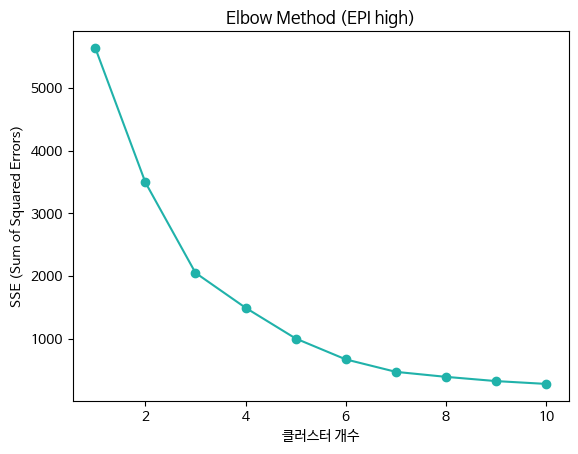

In [35]:
# EPI_high에서 '수재보험료누적', '수재발생손해액누적' 열만 선택
df_EPI_high = EPI_high[['수재보험료누적', '수재발생손해액누적']]

# 데이터 표준화
scaler_EPI_high = StandardScaler()
standardized_EPI_high = scaler_EPI_high.fit_transform(df_EPI_high)

# Elbow Method를 사용하여 적절한 클러스터 개수 찾기
sse_EPI_high = []
K_EPI_high = range(1, 11)
for k_high in K_EPI_high:
    kmeans_EPI_high = KMeans(n_clusters=k_high, random_state=42)
    kmeans_EPI_high.fit(standardized_EPI_high)
    sse_EPI_high.append(kmeans_EPI_high.inertia_)

# Elbow Method 그래프 출력
plt.plot(K_EPI_high, sse_EPI_high, color='lightseagreen', marker='o')
plt.xlabel('클러스터 개수')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method (EPI high)')
plt.show()

## k=5 일 때 k-means (EPI high)
2800개 중 240개 + a

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-99-ed2ad2f672c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPI_high['5-Means'] = clusters_EPI_high_k5


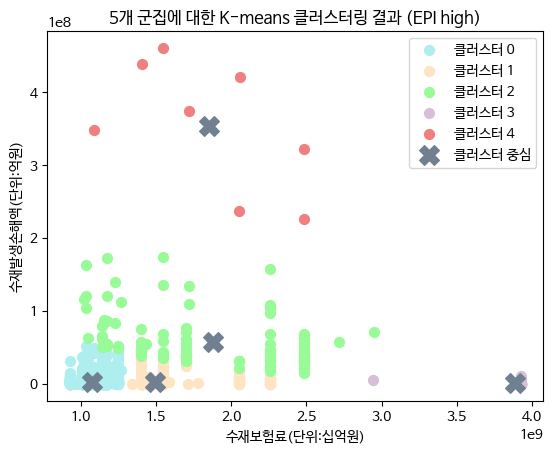

In [ ]:
# K-means 클러스터링 (k=5) - EPI_high 기준
kmeans_EPI_high_k5 = KMeans(n_clusters=5, random_state=42)
clusters_EPI_high_k5 = kmeans_EPI_high_k5.fit_predict(standardized_EPI_high)

# 결과를 데이터프레임에 추가
EPI_high['5-Means'] = clusters_EPI_high_k5

# 클러스터링 결과 시각화
colors_EPI_high_5 = ['paleturquoise', 'bisque', 'palegreen', 'thistle', 'lightcoral']
for cluster_num_EPI in range(5):
    cluster_data_EPI = EPI_high[clusters_EPI_high_k5 == cluster_num_EPI]
    plt.scatter(cluster_data_EPI['수재보험료누적'],
                cluster_data_EPI['수재발생손해액누적'],
                label=f'클러스터 {cluster_num_EPI}', s=50, color=colors_EPI_high_5[cluster_num_EPI])

# 클러스터 중심 플로팅
cluster_centers_2d_EPI_high_k5 = scaler_EPI_high.inverse_transform(kmeans_EPI_high_k5.cluster_centers_)
plt.scatter(cluster_centers_2d_EPI_high_k5[:, 0], cluster_centers_2d_EPI_high_k5[:, 1],
            color='slategrey', marker='X', s=200, label='클러스터 중심')

# 축 레이블 및 그래픽 설정
plt.xlabel('수재보험료(단위:십억원)')
plt.ylabel('수재발생손해액(단위:억원)')
plt.title('5개 군집에 대한 K-means 클러스터링 결과 (EPI high)')
plt.legend()
plt.show()

In [ ]:
# 5개 클러스터에 해당하는 데이터의 개수 알아내기
count_clusters_EPI_high_k5 = []
for cluster_num in range(5):
    count = len(EPI_high[clusters_EPI_high_k5 == cluster_num])
    count_clusters_EPI_high_k5.append(count)
    print(f'클러스터 {cluster_num}에 해당하는 데이터의 개수: {count}')

클러스터 0에 해당하는 데이터의 개수: 2013
클러스터 1에 해당하는 데이터의 개수: 664
클러스터 2에 해당하는 데이터의 개수: 110
클러스터 3에 해당하는 데이터의 개수: 24
클러스터 4에 해당하는 데이터의 개수: 8


## k=6 일 때 k-means (EPI high)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-46-4814621fa487>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPI_high['6-Means'] = clusters_EPI_high_k6


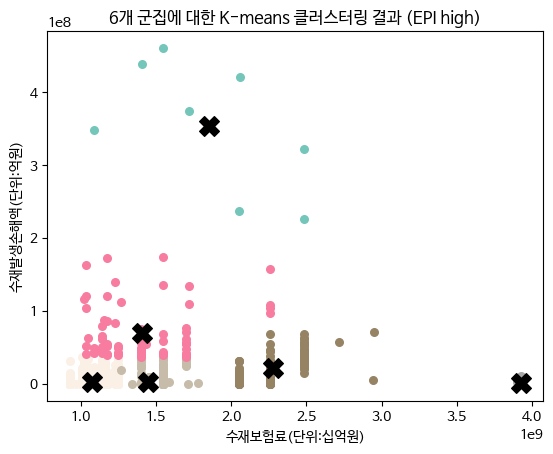

In [46]:
# K-means 클러스터링 (k=6) - EPI_high 기준
kmeans_EPI_high_k6 = KMeans(n_clusters=6, random_state=42)
clusters_EPI_high_k6 = kmeans_EPI_high_k6.fit_predict(standardized_EPI_high)

# 결과를 데이터프레임에 추가
EPI_high['6-Means'] = clusters_EPI_high_k6

# 클러스터링 결과 시각화
colors_EPI_high_6 = ['#faf0e6', '#c7bcaa', '#968364', '#a6a6a6', '#74c6ba', '#f77c9f']

for cluster_num_EPI in range(6):
    cluster_data_EPI = EPI_high[clusters_EPI_high_k6 == cluster_num_EPI]
    plt.scatter(cluster_data_EPI['수재보험료누적'],
                cluster_data_EPI['수재발생손해액누적'],
                label=f'클러스터 {cluster_num_EPI}', s=30, color=colors_EPI_high_6[cluster_num_EPI])

# 클러스터 중심 플로팅
cluster_centers_2d_EPI_high_k6 = scaler_EPI_high.inverse_transform(kmeans_EPI_high_k6.cluster_centers_)
plt.scatter(cluster_centers_2d_EPI_high_k6[:, 0], cluster_centers_2d_EPI_high_k6[:, 1],
            color='k', marker='X', s=200, label='클러스터 중심')

# 축 레이블 및 그래픽 설정
plt.xlabel('수재보험료(단위:십억원)')
plt.ylabel('수재발생손해액(단위:억원)')
plt.title('6개 군집에 대한 K-means 클러스터링 결과 (EPI high)')
plt.show()


In [ ]:
# 6개 클러스터에 해당하는 데이터의 개수 알아내기
count_clusters_EPI_high_k6 = []
for cluster_num in range(6):
    count = len(EPI_high[clusters_EPI_high_k6 == cluster_num])
    count_clusters_EPI_high_k6.append(count)
    print(f'클러스터 {cluster_num}에 해당하는 데이터의 개수: {count}')

클러스터 0에 해당하는 데이터의 개수: 1999
클러스터 1에 해당하는 데이터의 개수: 622
클러스터 2에 해당하는 데이터의 개수: 96
클러스터 3에 해당하는 데이터의 개수: 23
클러스터 4에 해당하는 데이터의 개수: 8
클러스터 5에 해당하는 데이터의 개수: 71


In [ ]:
# 클러스터 5에 해당하는 데이터 중에서 가장 !큰! 수재발생손해액누적값을 가진 데이터 찾기
cluster_5_data_min_loss_EPI_high = EPI_high[EPI_high['6-Means'] == 5].nlargest(1, '수재발생손해액누적')

# 부동소수점 표기법 수정 및 'e' 제거
cluster_5_data_min_loss_EPI_high['수재발생손해액누적'] = cluster_5_data_min_loss_EPI_high['수재발생손해액누적'].apply(lambda x: '{:,.0f}'.format(x))
cluster_5_data_min_loss_EPI_high['수재보험료누적'] = cluster_5_data_min_loss_EPI_high['수재보험료누적'].apply(lambda x: '{:,.0f}'.format(x))
cluster_5_data_min_loss_EPI_high['수재손해율'] = cluster_5_data_min_loss_EPI_high['수재손해율'].apply(lambda x: '{:,.6f}'.format(x))

# 출력
print("\n클러스터 5에 속하는 데이터 중에서 가장 큰 수재발생손해액누적값을 가진 데이터:")
display(cluster_5_data_min_loss_EPI_high)


클러스터 5에 속하는 데이터 중에서 가장 큰 수재발생손해액누적값을 가진 데이터:


,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수,클러스터_3개,6-Means
41923,C2019030757532-20190904,C2019030757532,201901,일반배상책임보험,"1,547,000,000","173,530,000",0.112172,1,1,5


✅ 1억 7천 3백만원

In [ ]:
# 각 클러스터 중심값 출력 (부동소수점 표기법 수정)
클러스터별_중심값_EPI_high_k6 = pd.DataFrame(scaler_EPI_high.inverse_transform(kmeans_EPI_high_k6.cluster_centers_), columns=['수재보험료누적', '수재발생손해액누적'])
# 부동소수점 표기법 수정 및 출력
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))
print("\n각 클러스터 중심값:")
display(클러스터별_중심값_EPI_high_k6)


각 클러스터 중심값:


,수재보험료누적,수재발생손해액누적
0,"1,073,535,778","2,638,818"
1,"1,447,846,029","3,033,111"
2,"2,277,408,092","21,919,017"
3,"3,925,060,377","1,182,075"
4,"1,855,430,902","353,465,045"
5,"1,409,543,140","69,545,160"


## k=7 일 때 k-means (EPI high)
2800개 중 24개 클러스터2,4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-132-73aa5c0342d9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPI_high['7-Means'] = clusters_EPI_high_k7


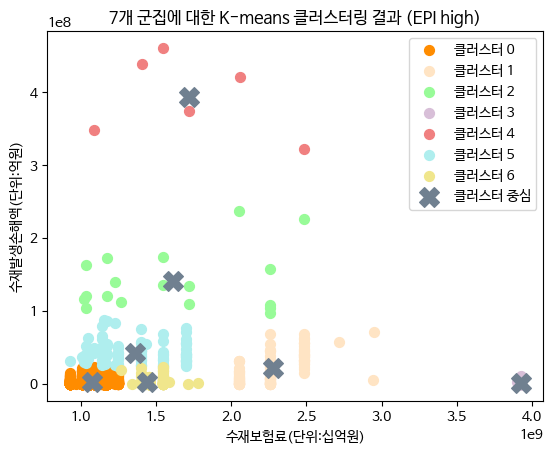

In [ ]:
# K-means 클러스터링 (k=7) - EPI_high 기준
kmeans_EPI_high_k7 = KMeans(n_clusters=7, random_state=42)
clusters_EPI_high_k7 = kmeans_EPI_high_k7.fit_predict(standardized_EPI_high)

# 결과를 데이터프레임에 추가
EPI_high['7-Means'] = clusters_EPI_high_k7

# 클러스터링 결과 시각화
for cluster_num_EPI in range(7):
    cluster_data_EPI = EPI_high[clusters_EPI_high_k7 == cluster_num_EPI]
    plt.scatter(cluster_data_EPI['수재보험료누적'],
                cluster_data_EPI['수재발생손해액누적'],
                label=f'클러스터 {cluster_num_EPI}', s=50, color=colors_EPI_high_7[cluster_num_EPI])

# 클러스터 중심 플로팅
cluster_centers_2d_EPI_high_k7 = scaler_EPI_high.inverse_transform(kmeans_EPI_high_k7.cluster_centers_)
plt.scatter(cluster_centers_2d_EPI_high_k7[:, 0], cluster_centers_2d_EPI_high_k7[:, 1],
            color='slategray', marker='X', s=200, label='클러스터 중심')

# 축 레이블 및 그래픽 설정
plt.xlabel('수재보험료(단위:십억원)')
plt.ylabel('수재발생손해액(단위:억원)')
plt.title('7개 군집에 대한 K-means 클러스터링 결과 (EPI high)')
plt.legend()
plt.show()


In [ ]:
# 7개 클러스터에 해당하는 데이터의 개수 알아내기
count_clusters_EPI_high_k7 = []
for cluster_num in range(7):
    count = len(EPI_high[clusters_EPI_high_k7 == cluster_num])
    count_clusters_EPI_high_k7.append(count)
    print(f'클러스터 {cluster_num}에 해당하는 데이터의 개수: {count}')

클러스터 0에 해당하는 데이터의 개수: 1977
클러스터 1에 해당하는 데이터의 개수: 96
클러스터 2에 해당하는 데이터의 개수: 18
클러스터 3에 해당하는 데이터의 개수: 23
클러스터 4에 해당하는 데이터의 개수: 6
클러스터 5에 해당하는 데이터의 개수: 99
클러스터 6에 해당하는 데이터의 개수: 600


In [ ]:
# 클러스터 2에 해당하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터 찾기
cluster_4_data_min_loss_EPI_high = EPI_high[EPI_high['7-Means'] == 2].nsmallest(1, '수재발생손해액누적')

# 부동소수점 표기법 수정 및 'e' 제거
cluster_4_data_min_loss_EPI_high['수재발생손해액누적'] = cluster_4_data_min_loss_EPI_high['수재발생손해액누적'].apply(lambda x: '{:,.0f}'.format(x))
cluster_4_data_min_loss_EPI_high['수재보험료누적'] = cluster_4_data_min_loss_EPI_high['수재보험료누적'].apply(lambda x: '{:,.0f}'.format(x))

# 출력
print("\n클러스터 2에 속하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터:")
display(cluster_4_data_min_loss_EPI_high)


클러스터 4에 속하는 데이터 중에서 가장 작은 수재발생손해액누적값을 가진 데이터:


,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,수재손해율,claim횟수,클러스터_3개,7-Means
9867,C2018015840934-20190401,C2018015840934,201801,일반배상책임보험,"2,255,440,000","97,445,268",0.043205,1,1,2




*   국내임의 일반배상책임보험의 경우 LL 발생빈도는 다음과 같다

전체 사고 38445 개 중에서 발생손해액 아웃라이어인 400개 + clustering 결과 LL 인 104개 \
504 / 38445 = 0.01310964
